# Importing the Libraries

In [1]:
# import data manipulation packages
import os
import random
import zipfile
import shutil
from shutil import copyfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# import deep learning tools 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Exctacting and Splitting The Dataset

In [2]:
shutil.rmtree('EYEAM Image Data')
shutil.rmtree('EYEAM Splitted Dataset')

In [3]:
local_zip = 'EYEAM_Image_Data.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall(os.getcwd())
zip_ref.close()

In [4]:
source_path = 'EYEAM Image Data'

for dir in os.listdir(source_path):
  i = 1
  for img in os.listdir(os.path.join(source_path, dir)):
    os.rename(os.path.join(source_path, dir, img), os.path.join(source_path, dir, dir) + f'_{i}' +
              os.path.splitext(os.path.join(source_path, dir, img))[1])
    i += 1

source_path_binturong = os.path.join(source_path, "Binturong")
source_path_koala = os.path.join(source_path, "Koala")
source_path_sanfords_brown_lemur = os.path.join(source_path, "Sanford_s Brown Lemur")
source_path_siau_island_tarsier = os.path.join(source_path, "Siau Island Tarsier")
source_path_walrus = os.path.join(source_path, "Walrus")
source_path_lemur_catta = os.path.join(source_path, "Lemur Catta")


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_binturong))} images of Binturong.")
print(f"There are {len(os.listdir(source_path_koala))} images of Koala.")
print(f"There are {len(os.listdir(source_path_sanfords_brown_lemur))} images of Sanfords Brown Lemur.")
print(f"There are {len(os.listdir(source_path_siau_island_tarsier))} images of Siau Island Tarsier.")
print(f"There are {len(os.listdir(source_path_walrus))} images of Walrus.")
print(f"There are {len(os.listdir(source_path_lemur_catta))} images of Lemur Catta.")

There are 50 images of Binturong.
There are 50 images of Koala.
There are 50 images of Sanfords Brown Lemur.
There are 50 images of Siau Island Tarsier.
There are 50 images of Walrus.
There are 50 images of Lemur Catta.


In [5]:
# Define root directory
root_dir = 'EYEAM Splitted Dataset'

os.mkdir(root_dir)

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# Creating Training and Testing Directories
def create_train_test_dirs(root_path):
  training_dir = os.path.join(root_path, "training")
  testing_dir  = os.path.join(root_path, "testing")

  training_binturong_dir = os.path.join(training_dir, "binturong")
  training_koala_dir = os.path.join(training_dir, "koala")
  training_sanfords_brown_lemur_dir = os.path.join(training_dir, "sanfords_brown_lemur")
  training_siau_island_tarsier_dir = os.path.join(training_dir, "siau_island_tarsier")
  training_walrus_dir = os.path.join(training_dir, "walrus")
  training_lemur_catta_dir = os.path.join(training_dir, "lemur_catta")

  testing_binturong_dir = os.path.join(testing_dir, "binturong")
  testing_koala_dir = os.path.join(testing_dir, "koala")
  testing_sanfords_brown_lemur_dir = os.path.join(testing_dir, "sanfords_brown_lemur")
  testing_siau_island_tarsier_dir = os.path.join(testing_dir, "siau_island_tarsier")
  testing_walrus_dir = os.path.join(testing_dir, "walrus")
  testing_lemur_catta_dir = os.path.join(testing_dir, "lemur_catta")

  os.makedirs(training_binturong_dir, exist_ok = True)
  os.makedirs(training_koala_dir, exist_ok = True)
  os.makedirs(training_sanfords_brown_lemur_dir, exist_ok = True)
  os.makedirs(training_siau_island_tarsier_dir, exist_ok = True)
  os.makedirs(training_walrus_dir, exist_ok = True)
  os.makedirs(training_lemur_catta_dir, exist_ok = True)
  
  os.makedirs(testing_binturong_dir, exist_ok = True)
  os.makedirs(testing_koala_dir, exist_ok = True)
  os.makedirs(testing_sanfords_brown_lemur_dir, exist_ok = True)
  os.makedirs(testing_siau_island_tarsier_dir, exist_ok = True)
  os.makedirs(testing_walrus_dir, exist_ok = True)
  os.makedirs(testing_lemur_catta_dir, exist_ok = True)

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
# Test your create_train_test_dirs function
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

EYEAM Splitted Dataset\testing
EYEAM Splitted Dataset\training
EYEAM Splitted Dataset\testing\binturong
EYEAM Splitted Dataset\testing\koala
EYEAM Splitted Dataset\testing\lemur_catta
EYEAM Splitted Dataset\testing\sanfords_brown_lemur
EYEAM Splitted Dataset\testing\siau_island_tarsier
EYEAM Splitted Dataset\testing\walrus
EYEAM Splitted Dataset\training\binturong
EYEAM Splitted Dataset\training\koala
EYEAM Splitted Dataset\training\lemur_catta
EYEAM Splitted Dataset\training\sanfords_brown_lemur
EYEAM Splitted Dataset\training\siau_island_tarsier
EYEAM Splitted Dataset\training\walrus


In [7]:
# Splitting the data into training and testing
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for file_name in os.listdir(SOURCE):
    the_file = SOURCE + file_name
    if os.path.getsize(the_file) > 0:
      files.append(file_name)
    else:
      print(file_name + " is zero length, so ignoring.")

  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[training_length:]

  for file_name in training_set:
    file_this = SOURCE + file_name
    dest     = TRAINING + file_name
    copyfile(file_this, dest)

  for file_name in testing_set:
      file_this = SOURCE + file_name
      dest     = TESTING + file_name
      copyfile(file_this, dest)
  pass

In [8]:
# Test your split_data function

# Define paths
BINTURONG_SOURCE_DIR = "EYEAM Image Data/Binturong/"
KOALA_SOURCE_DIR = "EYEAM Image Data/Koala/"
SANFORD_S_BROWN_LEMUR_SOURCE_DIR = "EYEAM Image Data/Sanford_s Brown Lemur/"
SIAU_ISLAND_TARSIER_SOURCE_DIR = "EYEAM Image Data/Siau Island Tarsier/"
WALRUS_SOURCE_DIR = "EYEAM Image Data/Walrus/"
LEMUR_CATTA_SOURCE_DIR = "EYEAM Image Data/Lemur Catta/"

TRAINING_DIR = "EYEAM Splitted Dataset/training/"
TESTING_DIR = "EYEAM Splitted Dataset/testing/"

TRAINING_BINTURONG_DIR = os.path.join(TRAINING_DIR, "binturong/")
TESTING_BINTURONG_DIR = os.path.join(TESTING_DIR, "binturong/")

TRAINING_KOALA_DIR = os.path.join(TRAINING_DIR, "koala/")
TESTING_KOALA_DIR = os.path.join(TESTING_DIR, "koala/")

TRAINING_SANFORD_S_BROWN_LEMUR_DIR = os.path.join(TRAINING_DIR, "sanfords_brown_lemur/")
TESTING_SANFORD_S_BROWN_LEMUR_DIR = os.path.join(TESTING_DIR, "sanfords_brown_lemur/")

TRAINING_SIAU_ISLAND_TARSIER_DIR = os.path.join(TRAINING_DIR, "siau_island_tarsier/")
TESTING_SIAU_ISLAND_TARSIER_DIR = os.path.join(TESTING_DIR, "siau_island_tarsier/")

TRAINING_WALRUS_DIR = os.path.join(TRAINING_DIR, "walrus/")
TESTING_WALRUS_DIR = os.path.join(TESTING_DIR, "walrus/")

TRAINING_LEMUR_CATTA_DIR = os.path.join(TRAINING_DIR, "lemur_catta/")
TESTING_LEMUR_CATTA_DIR = os.path.join(TESTING_DIR, "lemur_catta/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_BINTURONG_DIR)) > 0:
  for file in os.scandir(TRAINING_BINTURONG_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KOALA_DIR)) > 0:
  for file in os.scandir(TRAINING_KOALA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SANFORD_S_BROWN_LEMUR_DIR)) > 0:
  for file in os.scandir(TRAINING_SANFORD_S_BROWN_LEMUR_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SIAU_ISLAND_TARSIER_DIR)) > 0:
  for file in os.scandir(TRAINING_SIAU_ISLAND_TARSIER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_WALRUS_DIR)) > 0:
  for file in os.scandir(TRAINING_WALRUS_DIR):
    os.remove(file.path)

if len(os.listdir(TESTING_BINTURONG_DIR)) > 0:
  for file in os.scandir(TESTING_BINTURONG_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_KOALA_DIR)) > 0:
  for file in os.scandir(TESTING_KOALA_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SANFORD_S_BROWN_LEMUR_DIR)) > 0:
  for file in os.scandir(TESTING_SANFORD_S_BROWN_LEMUR_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SIAU_ISLAND_TARSIER_DIR)) > 0:
  for file in os.scandir(TESTING_SIAU_ISLAND_TARSIER_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_WALRUS_DIR)) > 0:
  for file in os.scandir(TESTING_WALRUS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .7

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(BINTURONG_SOURCE_DIR, TRAINING_BINTURONG_DIR, TESTING_BINTURONG_DIR, split_size)
split_data(KOALA_SOURCE_DIR, TRAINING_KOALA_DIR, TESTING_KOALA_DIR, split_size)
split_data(SANFORD_S_BROWN_LEMUR_SOURCE_DIR, TRAINING_SANFORD_S_BROWN_LEMUR_DIR, TESTING_SANFORD_S_BROWN_LEMUR_DIR, split_size)
split_data(SIAU_ISLAND_TARSIER_SOURCE_DIR, TRAINING_SIAU_ISLAND_TARSIER_DIR, TESTING_SIAU_ISLAND_TARSIER_DIR, split_size)
split_data(WALRUS_SOURCE_DIR, TRAINING_WALRUS_DIR, TESTING_WALRUS_DIR, split_size)
split_data(LEMUR_CATTA_SOURCE_DIR, TRAINING_LEMUR_CATTA_DIR, TESTING_LEMUR_CATTA_DIR, split_size)

# Check that the number of images matches the expected output
print(f"There are {len(os.listdir(TRAINING_BINTURONG_DIR))} images of binturongs for training")
print(f"There are {len(os.listdir(TESTING_BINTURONG_DIR))} images of binturongs for testing")

print(f"\n\nThere are {len(os.listdir(TRAINING_KOALA_DIR))} images of koalas for training")
print(f"There are {len(os.listdir(TESTING_KOALA_DIR))} images of koalas for testing")

print(f"\n\nThere are {len(os.listdir(TRAINING_SANFORD_S_BROWN_LEMUR_DIR))} images of sanford's brown_lemurs for training")
print(f"There are {len(os.listdir(TESTING_SANFORD_S_BROWN_LEMUR_DIR))} images of sanford's brown_lemurs for testing")

print(f"\n\nThere are {len(os.listdir(TRAINING_SIAU_ISLAND_TARSIER_DIR))} images of siau island tarsiers for training")
print(f"There are {len(os.listdir(TESTING_SIAU_ISLAND_TARSIER_DIR))} images of siau island tarsiers for testing")

print(f"\n\nThere are {len(os.listdir(TRAINING_WALRUS_DIR))} images of walruses for training")
print(f"There are {len(os.listdir(TESTING_WALRUS_DIR))} images of walruses for testing")

print(f"\n\nThere are {len(os.listdir(TRAINING_LEMUR_CATTA_DIR))} images of lemur cattas for training")
print(f"There are {len(os.listdir(TESTING_LEMUR_CATTA_DIR))} images of lemur cattas for testing")

There are 35 images of binturongs for training
There are 15 images of binturongs for testing


There are 35 images of koalas for training
There are 15 images of koalas for testing


There are 35 images of sanford's brown_lemurs for training
There are 15 images of sanford's brown_lemurs for testing


There are 35 images of siau island tarsiers for training
There are 15 images of siau island tarsiers for testing


There are 35 images of walruses for training
There are 15 images of walruses for testing


There are 35 images of lemur cattas for training
There are 15 images of lemur cattas for testing


# Setting up ImageDataGenerator

In [9]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                     rotation_range=45,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15,
                                     shear_range=0.15,
                                     zoom_range=0.15,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode="binary",
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=50,
                                                      class_mode="binary",
                                                      target_size=(224, 224))
  
  return train_generator, validation_generator

In [10]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 210 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


# Transfer Learning

In [33]:
# Import the inception model  
from tensorflow.keras.applications import MobileNetV2

# Creating pre-trained model
def create_pre_trained_model():
  pre_trained_model = MobileNetV2(input_shape = (224, 224, 3),
                                  include_top = False, 
                                  weights = 'imagenet') 

  for the_layer in pre_trained_model.layers:
    the_layer.trainable = False

  return pre_trained_model
  

In [34]:
pre_trained_model = create_pre_trained_model()

# Print the model summary
#pre_trained_model.summary()

In [35]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 2,257,984 total parameters in this model.
There are 0 trainable parameters in this model.


# Pipelining and Building the Model

In [36]:
def output_of_last_layer(pre_trained_model):
  last_desired_layer = pre_trained_model.get_layer('block_14_project')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [37]:
# Pilih layer dari sini. Ambil yang relatif di bawah, lalu namanya taruh di 'get_layer' dari cell di atas.
for the_layer in pre_trained_model.layers:
    print(the_layer.name)

input_3
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
block_6_expand

In [38]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 160)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 160), dtype=tf.float32, name=None), name='block_14_project/Conv2D:0', description="created by layer 'block_14_project'")


In [39]:
# Creating model
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)    
  x = layers.Dense(6, activation='softmax')(x)          

  model = Model(inputs=pre_trained_model.input, outputs=x)
  
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']) 

  return model

In [40]:
# Saving model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 9,075,398 total parameters in this model.
There are 8,035,334 trainable parameters in this model.


In [41]:
# Training the model
history = model.fit(train_generator,
                    steps_per_epoch = 3,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
3/3 [==============================] - 15s 5s/step - loss: 14.3522 - accuracy: 0.2182 - val_loss: 26.9813 - val_accuracy: 0.1667
Epoch 2/15
3/3 [==============================] - 15s 6s/step - loss: 20.5159 - accuracy: 0.2133 - val_loss: 10.6670 - val_accuracy: 0.3000
Epoch 3/15
3/3 [==============================] - 11s 4s/step - loss: 13.4120 - accuracy: 0.2182 - val_loss: 7.1532 - val_accuracy: 0.5111
Epoch 4/15
3/3 [==============================] - 13s 4s/step - loss: 7.5186 - accuracy: 0.4364 - val_loss: 7.1495 - val_accuracy: 0.3333
Epoch 5/15
3/3 [==============================] - 12s 6s/step - loss: 5.6837 - accuracy: 0.3545 - val_loss: 2.6943 - val_accuracy: 0.4667
Epoch 6/15
3/3 [==============================] - 14s 5s/step - loss: 2.8306 - accuracy: 0.3867 - val_loss: 3.1539 - val_accuracy: 0.2556
Epoch 7/15
3/3 [==============================] - 11s 5s/step - loss: 3.5817 - accuracy: 0.2455 - val_loss: 1.4247 - val_accuracy: 0.5778
Epoch 8/15
3/3 [=============

In [42]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,14.352201,0.218182,26.981316,0.166667
1,20.515942,0.213333,10.667012,0.300000
2,13.411959,0.218182,7.153228,0.511111
3,7.518581,0.436364,7.149549,0.333333
4,5.683711,0.354545,2.694342,0.466667
5,2.830571,0.386667,3.153898,0.255556
6,3.581696,0.245455,1.424673,0.577778
7,1.458969,0.600000,1.423966,0.666667
8,1.830246,0.527273,1.558651,0.600000
9,1.347672,0.600000,0.728354,0.677778


# Prediction Test

In [50]:
# predicting images

labels = ["Binturong", "Koala", "Lemur Catta", "Sanford's Brown Lemur", "Siau Island Tarsier", "Walrus"]

src = 'EYEAM Image Data'
res_dict = {}

import time
st = time.time()

for animals in os.listdir(src):
    for img in os.listdir(os.path.join(src, animals)):
        path = os.path.join(src, animals, img)

        #path = 'EYEAM Image Data\\Binturong\\Binturong_2.jpeg'
        img = tf.keras.utils.load_img(path, target_size=(224, 224))
        x = tf.keras.utils.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x/255

        images = np.vstack([x])
        classes = labels[np.argmax(model.predict(images))]

        #print(path)
        #print(classes)

        if classes in res_dict.keys():
          res_dict[classes] += 1
        else:
          res_dict[classes] = 1

et = time.time()

print('Time elapsed: {} seconds.'.format(et-st))

res_dict

1/1 [==============================] - 0s 96ms/step
EYEAM Image Data\Binturong\Binturong_1.jpg
Binturong
1/1 [==============================] - 0s 61ms/step
EYEAM Image Data\Binturong\Binturong_10.jpg
Sanford's Brown Lemur
1/1 [==============================] - 0s 49ms/step
EYEAM Image Data\Binturong\Binturong_11.jpg
Koala
1/1 [==============================] - 0s 67ms/step
EYEAM Image Data\Binturong\Binturong_12.jpg
Sanford's Brown Lemur
1/1 [==============================] - 0s 50ms/step
EYEAM Image Data\Binturong\Binturong_13.jpg
Binturong
1/1 [==============================] - 0s 50ms/step
EYEAM Image Data\Binturong\Binturong_14.jpg
Koala
1/1 [==============================] - 0s 56ms/step
EYEAM Image Data\Binturong\Binturong_15.jpg
Sanford's Brown Lemur
1/1 [==============================] - 0s 49ms/step
EYEAM Image Data\Binturong\Binturong_16.jpeg
Koala
1/1 [==============================] - 0s 54ms/step
EYEAM Image Data\Binturong\Binturong_17.jpg
Binturong
1/1 [=================

{'Binturong': 22,
 "Sanford's Brown Lemur": 65,
 'Koala': 83,
 'Lemur Catta': 39,
 'Siau Island Tarsier': 41,
 'Walrus': 50}

# Saving the Model

In [51]:
# Saving model into h5 format
from datetime import datetime
date = datetime.now().strftime("%Y_%m_%d-%I-%M-%S-%p")
model.save(f'H5 Models/model_1_mobilenetv2 ({date}).h5')

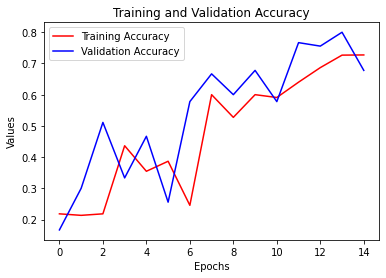

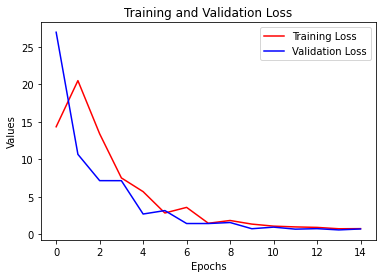

In [43]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, label="Training Accuracy", color='red')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='blue')
plt.title('Training and Validation Accuracy')
plt.ylabel('Values')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs,loss, label="Training Loss", color='red')
plt.plot(epochs,val_loss, label="Validation Loss", color='blue')
plt.title('Training and Validation Loss')
plt.ylabel('Values')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()